<a href="https://colab.research.google.com/github/Ednip7/MLWPy/blob/master/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practice from Python Data Science book, ch.4


In [4]:
import matplotlib.pyplot as plt


from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

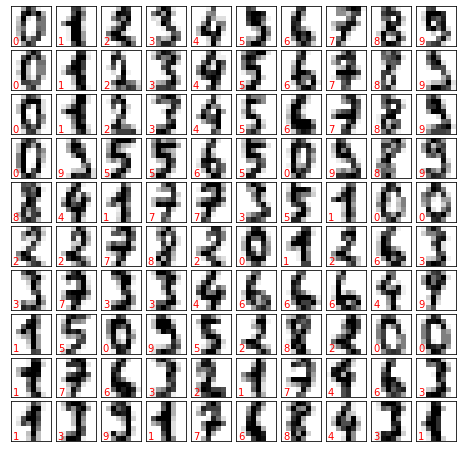

In [29]:
fig, axes = plt.subplots(10, 10, figsize= (8,8),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform = ax.transAxes, color = "red")

In [30]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

In [40]:
digits.target.shape

(1797,)

Unsupervised learning, dimensionality reduction

In [43]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

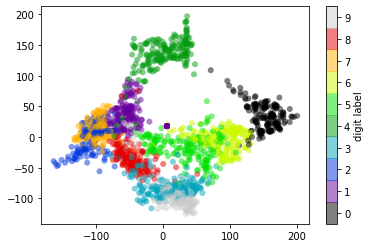

In [54]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
  edgecolor='none', alpha=0.5,
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state = 0)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_model, ytest)

0.8333333333333334

Text(91.68, 0.5, 'True value')

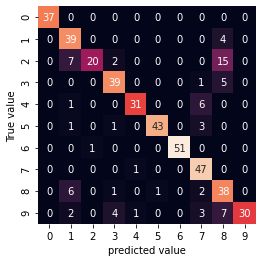

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square = True, annot = True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("True value")

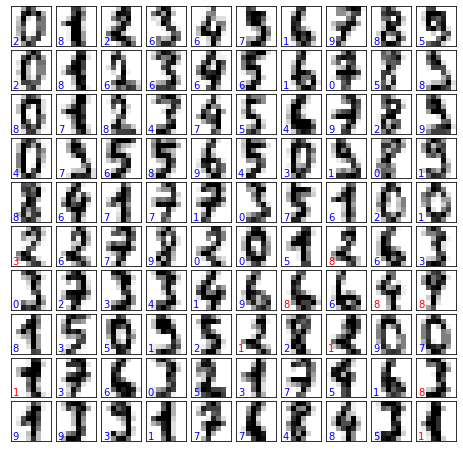

In [75]:
fig, axes = plt.subplots(10,10, figsize = (8,8),
                        subplot_kw = {"xticks":[], "yticks":[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
  ax.text(0.05, 0.05, str(y_model[i]),
          transform = ax.transAxes,
          color = "blue" if (ytest[i]==y_model[i] )else "red")